<a href="https://colab.research.google.com/github/pedersor/DFT_1d/blob/master/examples/1d_solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup

In [ ]:
!git clone https://github.com/pedersor/DFT_1d
!python3 -m pip install numpy==1.18.2 matplotlib==3.2.1 scipy==1.5.3

import sys
sys.path.append('/content/DFT_1d')

1D quantum system solver

Text(0, 0.5, 'V(x)')

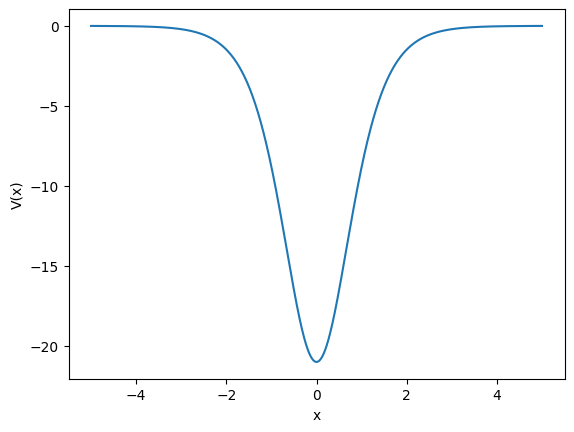

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from DFT_1d.non_interacting_solver import EigenSolver as solver1d

def poschl_teller(lam, grids):
  """Poschl-Teller potential.

    Poschl-Teller potential is a special class of potentials for which the
    one-dimensional Schrodinger equation can be solved in terms of Special
    functions.

    https://en.wikipedia.org/wiki/P%C3%B6schl%E2%80%93Teller_potential
  """
  
  return -lam * (lam + 1) / (2 * np.cosh(grids)**2)


# setup the 1D grid to evaluate the potential
grids = np.linspace(start=-5, stop=5,num=1000)
poschl_teller_potential = poschl_teller(lam=6, grids=grids)

# plot the potential
plt.plot(grids, poschl_teller_potential)
plt.xlabel('x')
plt.ylabel('V(x)')

Energy units in Hartree
Energy level 0: -18.000101746830836
Energy level 1: -12.500397304586853
Energy level 2: -8.000747151767499


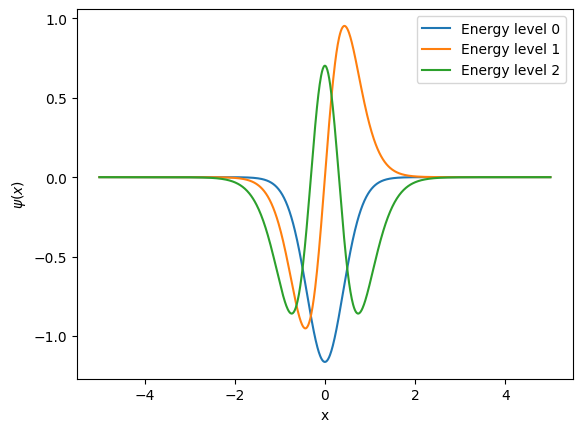

In [14]:
# solve the ground state up to 6 energy levels
num_energy_levels = 3
solver = solver1d(
    grids=grids,
    potential_fn=lambda _: poschl_teller_potential,
    num_electrons=num_energy_levels,
)
solver.solve_ground_state()

print('Energy units in Hartree')
for i in range(num_energy_levels):
  print(f'Energy level {i}: {solver.eigenvalues[i]}')
  plt.plot(grids, solver.wave_function[i], label=f'Energy level {i}')

plt.xlabel('x')
plt.ylabel('$\psi(x)$')
plt.legend()

Periodic system example

Text(0, 0.5, 'V(x)')

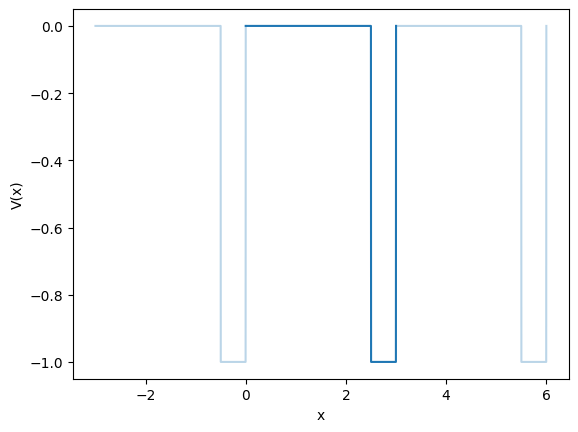

In [46]:
def kronig_penney(grids, a, b, v1, v2):
  """ Kronig-Penney model potential for a single unit cell. 
  
    https://en.wikipedia.org/wiki/Particle_in_a_one-dimensional_lattice#Kronig%E2%80%93Penney_model
  """
  pot = np.where(grids < (a - b), v1, v2)
  
  return pot

# setup the 1D unit cell grid to evaluate the periodic potential
unit_cell_grids = np.linspace(start=0, stop=3,num=1000)
kronig_penney_potential = kronig_penney(grids=unit_cell_grids, a=3, b=0.5, v1=0, v2=-1)

# several unit cells for plotting
plot_pot = np.copy(kronig_penney_potential)
plot_pot[-1] = 0
for i,alpha in zip([-1,0,1], [0.3,1,0.3]):
  plot_grids = unit_cell_grids + i * unit_cell_grids[-1]
  plt.plot(plot_grids, plot_pot, alpha=alpha, color='tab:blue')
plt.xlabel('x')
plt.ylabel('V(x)')


The defined unit cell is $x \in [0, 5]$ and is plotted in dark blue. The periodic images are also plotted but with lighter blue. Below we plot the dispersion relation for the Kronig-Penney model. 

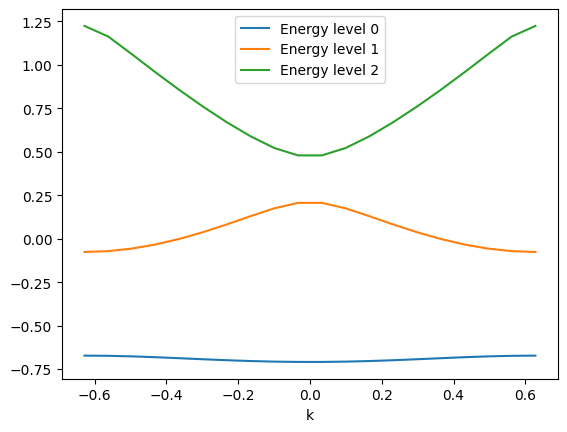

In [45]:
# reciprocal lattice vector
rec_lat_vec = np.pi / unit_cell_grids[-1]

num_energy_levels = 3
k_points = np.linspace(start=-rec_lat_vec, stop=rec_lat_vec, num=20)
energy_dispersion = []
for k_point in k_points:
  solver = solver1d(
      grids=unit_cell_grids,
      potential_fn=lambda _: kronig_penney_potential,
      num_electrons=num_energy_levels,
      boundary_condition='periodic',
      k_point=k_point,
  )
  solver.solve_ground_state()
  energy_dispersion.append(solver.eigenvalues)

energy_dispersion = np.array(energy_dispersion).T
for i in range(num_energy_levels):
  plt.plot(k_points, energy_dispersion[i], label=f'Energy level {i}')

plt.xlabel('k')
plt.legend()